<a href="https://colab.research.google.com/github/Prezii/Project/blob/main/Waveform_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install obspy
!pip install -U obspy
import obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [19]:
 #Additional packages
import numpy as np
import matplotlib.pyplot as plt

In this part we are goint to use IRIS metadata for NLLB and PGC stations

In [20]:
client = Client("IRIS")
network = "CN" #Canadian National Seismograph Network
station = "PGC"
location="*"
channel= "BH?"

In [21]:
starttime= UTCDateTime(2015, 7, 14, 22, 24, 57, 570000) 
endtime = starttime + 300 # 5 min = 300 sec

In [22]:
#starttime=starttime, endtime=endtime,
inv = client.get_stations(network=network, station=station, channel=channel,
                          level="response")

print(inv)

Inventory created at 2022-08-23T14:50:27.352000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?network=CN&station=P...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			CN
		Stations (1):
			CN.PGC (Sidney, BC, CA)
		Channels (18):
			CN.PGC..BHZ (6x), CN.PGC..BHN (6x), CN.PGC..BHE (6x)


In [23]:
st = client.get_waveforms(network=network, station = station, location = location, channel = channel , starttime=starttime, endtime=endtime,attach_response=True)
print(st) 

3 Trace(s) in Stream:
CN.PGC..BHE | 2015-07-14T22:24:57.575000Z - 2015-07-14T22:29:57.550000Z | 40.0 Hz, 12000 samples
CN.PGC..BHN | 2015-07-14T22:24:57.575000Z - 2015-07-14T22:29:57.550000Z | 40.0 Hz, 12000 samples
CN.PGC..BHZ | 2015-07-14T22:24:57.575000Z - 2015-07-14T22:29:57.550000Z | 40.0 Hz, 12000 samples


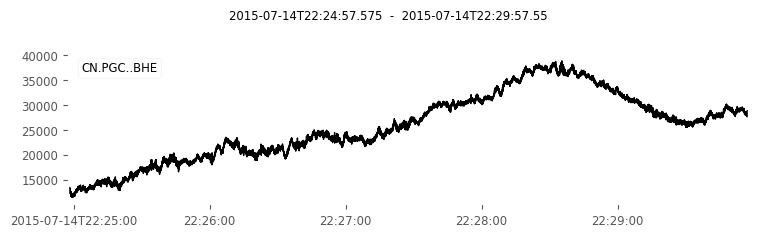

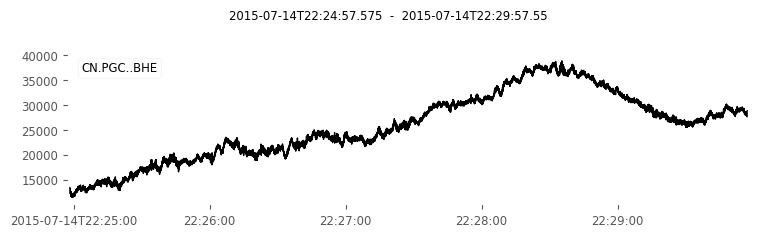

In [24]:
tr = st[0]
tr.plot()

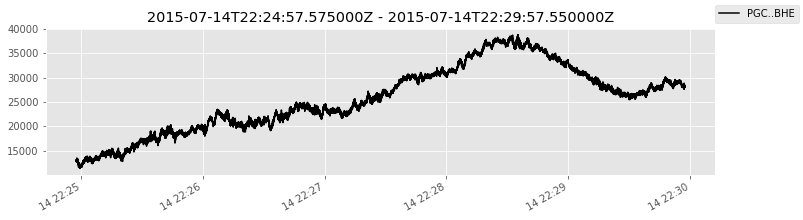

In [26]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(tr.times("matplotlib"), tr.data, color="0", label = f"{tr.stats.station}..{tr.stats.channel}")
ax.xaxis_date()
fig.autofmt_xdate()

fig.legend()
plt.title(f"{start_time} - {end_time}")
plt.show()

https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_waveforms.html